In [5]:
# FEATURE ENGINEERING

import pandas as pd

df = pd.read_csv('CEA_FAWN_3_Preprocessed_T_RH_RF_SR_Doy.csv')
df.dtypes

StationID          int64
Date              object
Temperature      float64
RelatHumidity    float64
Rainfall         float64
SolarRad         float64
doy                int64
dtype: object

In [6]:
df.shape

(122593, 7)

In [7]:
df.head()

,StationID,Date,Temperature,RelatHumidity,Rainfall,SolarRad,doy
0,110,2003-11-01,19.806,80.327,0.0000,14.882,305
1,110,2003-11-02,19.501,69.103,0.0000,16.198,306
2,110,2003-11-03,20.893,66.638,0.0000,15.755,307
3,110,2003-11-04,22.931,86.098,0.0225,7.090,308
4,110,2003-11-05,23.967,85.928,0.0000,10.619,309


In [8]:
columns=['Temperature','RelatHumidity','Rainfall','SolarRad']

In [10]:
# DATA AGGREGATION

df_days = df.groupby(['StationID','doy'])[columns].mean()
df_days = df_days.reset_index()
df_days.head()

,StationID,doy,Temperature,RelatHumidity,Rainfall,SolarRad
0,110,1,13.671475,83.146750,0.011525,6.996636
1,110,2,12.562275,81.620975,0.007250,6.998396
2,110,3,10.976100,79.621750,0.006575,8.420072
3,110,4,10.460450,78.191650,0.006125,10.146497
4,110,5,10.860100,79.660900,0.005775,10.100839


In [11]:
df_days.shape

(6148, 6)

In [8]:
print("Minimum and maximum values for each variable:")
print("> Temperature:")
print("Min: "+str(round(df_days['Temperature'].min(),2))+
      "ºC     Max: "+str(round(df_days['Temperature'].max(),2))+"ºC\n")
print("> Relative Humidity:")
print("Min: "+str(round(df_days['RelatHumidity'].min(),2))+
      "%      Max: "+str(round(df_days['RelatHumidity'].max(),2))+"%\n")
print("> Rainfall:")
print("Min: "+str(round(df_days['Rainfall'].min(),2))+
      "\"       Max: "+str(round(df_days['Rainfall'].max(),2))+"\"\n")
print("> Solar Radiation:")
print("Min: "+str(round(df_days['SolarRad'].min(),2))+
      " MJm2  Max: "+str(round(df_days['SolarRad'].max(),2))+" MJm2\n")

Minimum and maximum values for each variable:
> Temperature:
Min: 9.06ºC     Max: 27.15ºC

> Relative Humidity:
Min: 63.47%      Max: 88.52%

> Rainfall:
Min: 0.0"       Max: 0.01"

> Solar Radiation:
Min: 6.04 MJm2  Max: 26.68 MJm2



In [9]:
# Standardization

allColumns=['Temperature', 'RelatHumidity', 'Rainfall', 'SolarRad']

data_to_standardize = df_days[allColumns]
data_to_standardize.head()

,Temperature,RelatHumidity,Rainfall,SolarRad
0,13.671475,83.146750,0.011525,6.996636
1,12.562275,81.620975,0.007250,6.998396
2,10.976100,79.621750,0.006575,8.420072
3,10.460450,78.191650,0.006125,10.146497
4,10.860100,79.660900,0.005775,10.100839


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data_to_standardize)

standardized_data = scaler.transform(data_to_standardize)

df_days_standardized = pd.DataFrame(standardized_data, columns = ['Temperature', 'RelatHumidity', 'Rainfall', 'SolarRad'])
df_days_standardized.head()

/Users/marcosjr/JupyterNotebooks/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/marcosjr/JupyterNotebooks/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/marcosjr/JupyterNotebooks/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/marcosjr/JupyterNotebooks/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

,Temperature,RelatHumidity,Rainfall,SolarRad
0,-1.203898,1.501730,3.065413,-1.709293
1,-1.489656,1.136262,1.039038,-1.708913
2,-1.898296,0.657389,0.719084,-1.401799
3,-2.031141,0.314839,0.505781,-1.028853
4,-1.928181,0.666767,0.339879,-1.038716


In [11]:
df_days_standardized.insert(loc=0, column='StationID', value=df_days['StationID'])
df_days_standardized.insert(loc=1, column='doy', value=df_days['doy'])
df_days_standardized.head()

,StationID,doy,Temperature,RelatHumidity,Rainfall,SolarRad
0,110,1,-1.203898,1.501730,3.065413,-1.709293
1,110,2,-1.489656,1.136262,1.039038,-1.708913
2,110,3,-1.898296,0.657389,0.719084,-1.401799
3,110,4,-2.031141,0.314839,0.505781,-1.028853
4,110,5,-1.928181,0.666767,0.339879,-1.038716


In [12]:
df_days_standardized.shape

(6148, 6)

In [13]:
df_days_standardized.to_csv('CEA_FAWN_4_AggStd_T_RH_RF_SR_Doy.csv', index=False)

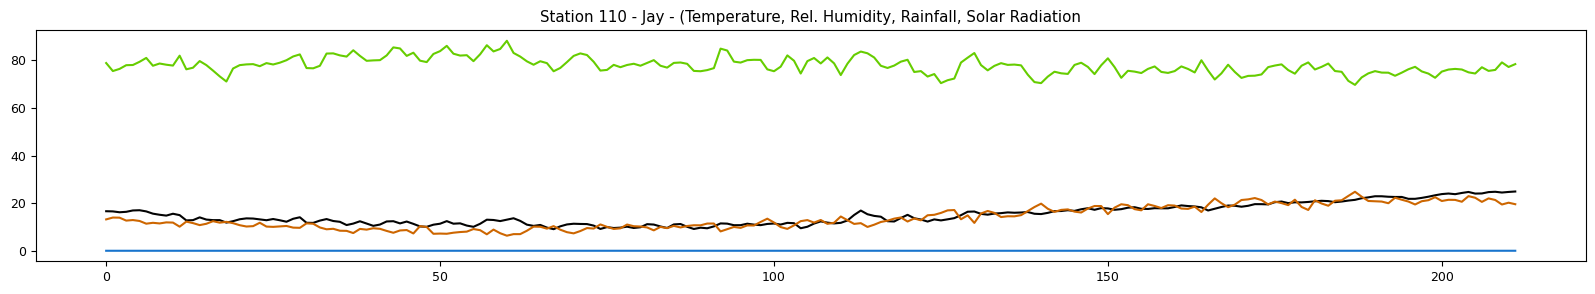

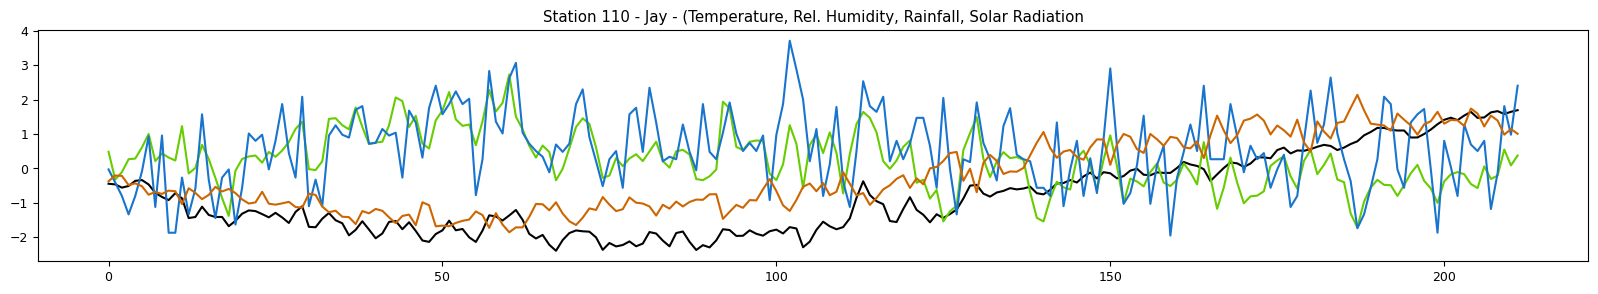

In [14]:
# Comparing Normal and Standardized Data
import pandas as pd
import numpy as np
from FWTSClust_functions import *


stations_list = df_days['StationID'].unique()

df_array = transform_dfTS_to_3Darray_DOYsorted(df_days,allColumns,151, 305)
plot_first_TS(df_array,stations_list)

df_array_std = transform_dfTS_to_3Darray_DOYsorted(df_days_standardized,allColumns,151, 305)
plot_first_TS(df_array_std,stations_list)

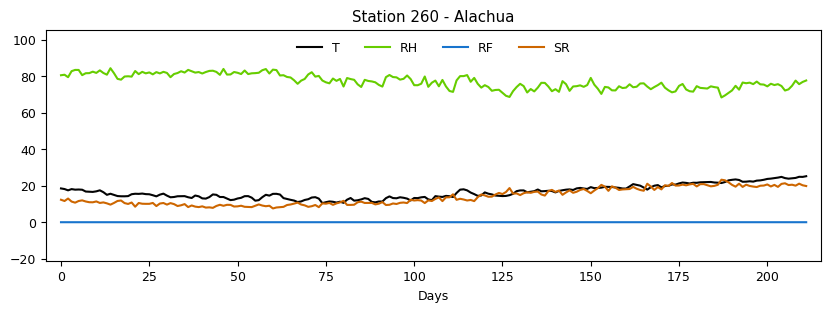

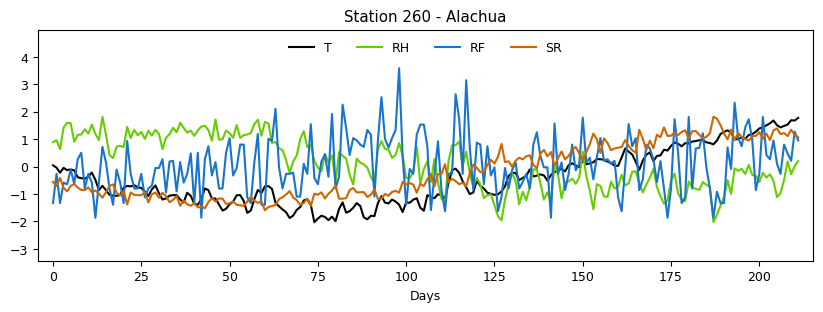

In [15]:
# plot specific station by index
plot_TS_by_index(df_array, stations_list, 10)
plot_TS_by_index(df_array_std, stations_list, 10)

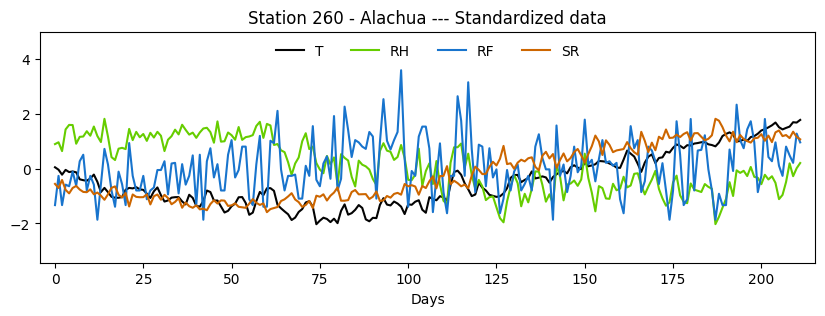

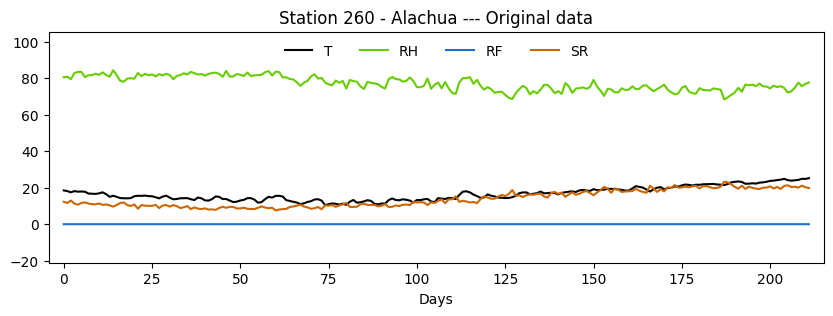

In [13]:
plot_TS_by_index_title(df_array_std, stations_list, 10, "Standardized data")
plot_TS_by_index_title(df_array, stations_list, 10, "Original data")

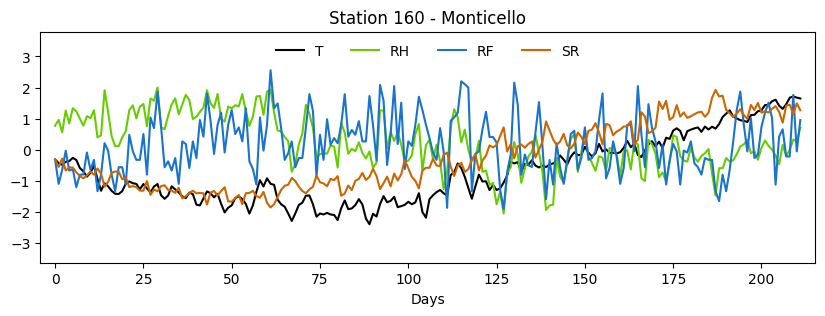

In [14]:
# plot specific station by index
#plot_TS_by_index(df_array, stations_list, 23)
plot_TS_by_index(df_array_std, stations_list, 4)

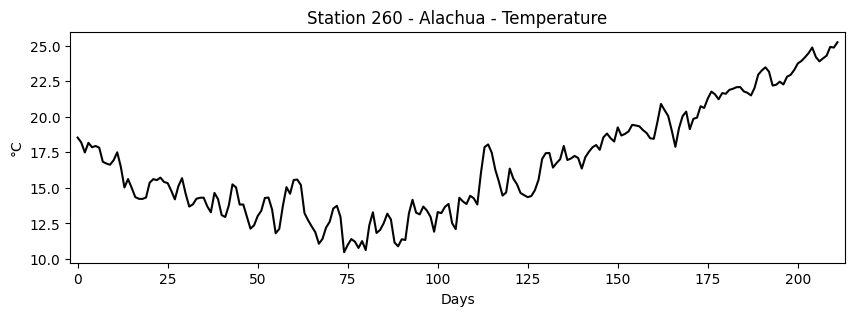

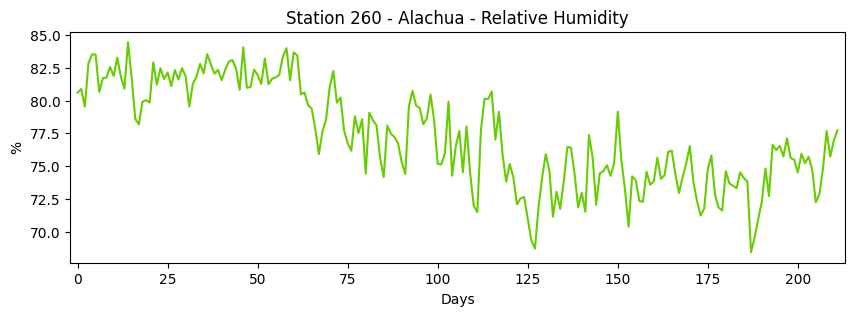

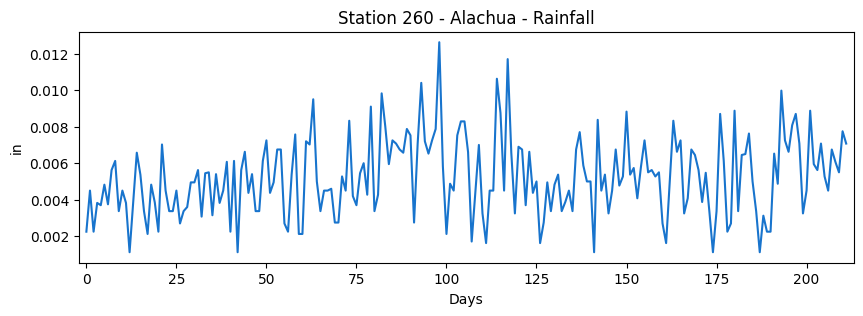

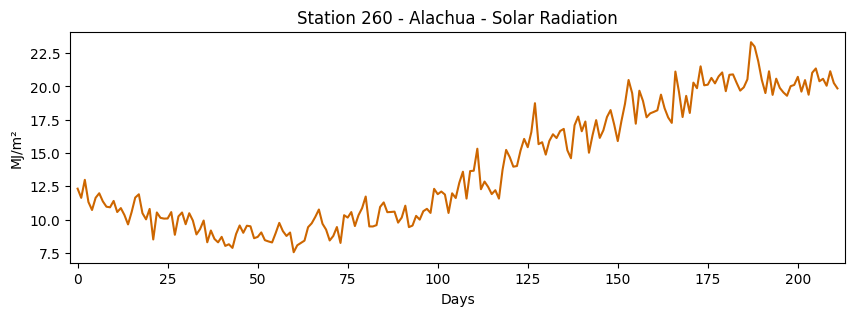

In [15]:
plot_TS_by_index_separated_variables(df_array, stations_list, 10)

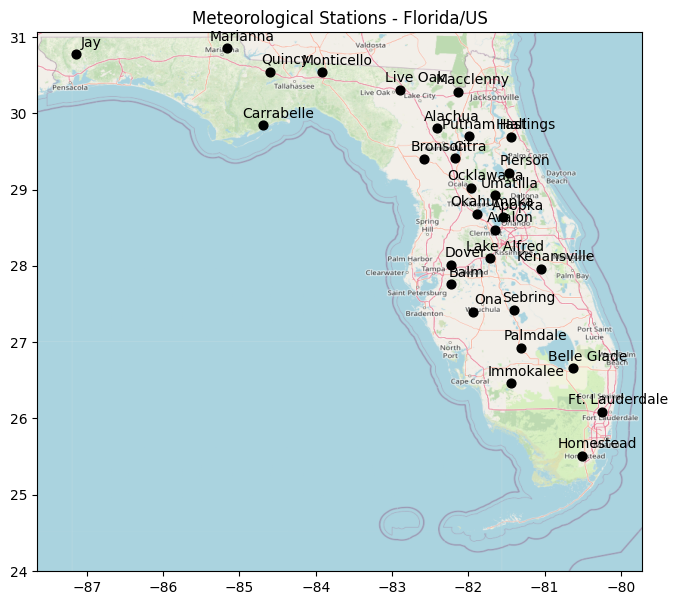

In [1]:
## PLOTS

import pandas as pd
from FWTSClust_functions import *

df = pd.read_csv('CEA_FAWN_4_AggStd_T_RH_RF_SR_Doy.csv')

stations = pd.read_csv('FAWNStationsListDeg.csv')

stations['latitude'] = stations['latitude'].astype(float)
stations['longitude'] = stations['longitude'].astype(float)

unique_station_ids = df['StationID'].unique()

stations = pd.read_csv('FAWNStationsListDeg.csv')
names = stations[['StationName','StationID']]
names_sort = names.sort_values(by=['StationID'])
names_sort.head()

stations_map = stations[stations.StationID.isin(unique_station_ids) == True]

plot_map_stations(stations_map)

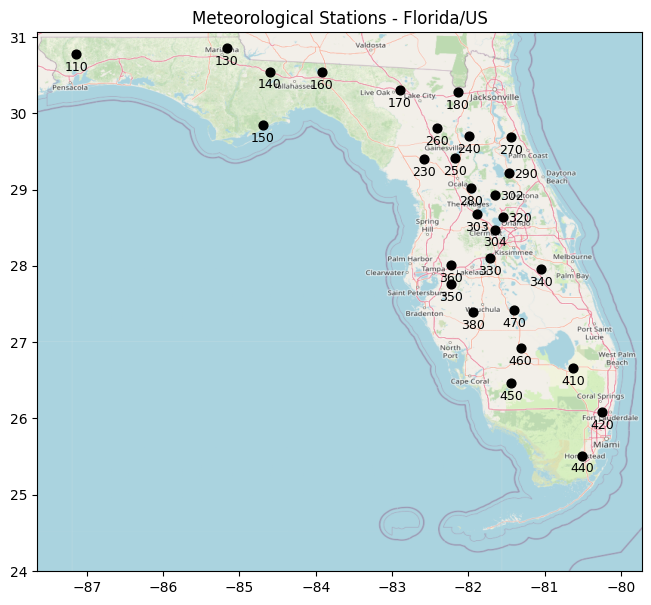

In [2]:
plot_map_stations_IDs(stations_map)